# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from NewKeys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_name = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
lat = []
lng = []
wind_speed = []


#####################################################
###########Tuesday, July 2, 2019 at 8:24PM###########
#################### Prints Data ####################
print("Beginning Data Retrieval")
print("-----------------------------")
count = 1
set = 1
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} of {set} | {city}")
        count += 1
        if count == 50:
            set += 1
            count =1
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
#################### Prints Data ####################
###########Tuesday, July 2, 2019 at 8:24PM###########
#####################################################

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 1 | longyearbyen
Processing Record 2 of 1 | qaanaaq
Processing Record 3 of 1 | vaini
Processing Record 4 of 1 | isangel
Processing Record 5 of 1 | kodiak
Processing Record 6 of 1 | boyolangu
Processing Record 7 of 1 | jamestown
Processing Record 8 of 1 | port elizabeth
City not found. Skipping...
Processing Record 9 of 1 | bluff
Processing Record 10 of 1 | busselton
Processing Record 11 of 1 | kruisfontein
Processing Record 12 of 1 | norman wells
Processing Record 13 of 1 | ushuaia
Processing Record 14 of 1 | xintai
Processing Record 15 of 1 | pavlodar
Processing Record 16 of 1 | hermanus
City not found. Skipping...
Processing Record 17 of 1 | broome
Processing Record 18 of 1 | ambilobe
Processing Record 19 of 1 | guerrero negro
City not found. Skipping...
Processing Record 20 of 1 | casper
Processing Record 21 of 1 | port alfred
Processing Record 22 of 1 | cherskiy
Processing Record 23 of 1 | abonnema
Proces

Processing Record 7 of 5 | neuquen
Processing Record 8 of 5 | salinas
Processing Record 9 of 5 | portland
Processing Record 10 of 5 | sao jose da coroa grande
Processing Record 11 of 5 | fortuna
Processing Record 12 of 5 | hami
City not found. Skipping...
Processing Record 13 of 5 | lata
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of 5 | omboue
Processing Record 15 of 5 | zhigalovo
Processing Record 16 of 5 | calabozo
Processing Record 17 of 5 | bubaque
Processing Record 18 of 5 | mehamn
Processing Record 19 of 5 | trairi
Processing Record 20 of 5 | mahanoro
Processing Record 21 of 5 | weyburn
City not found. Skipping...
Processing Record 22 of 5 | ixtapa
Processing Record 23 of 5 | ndioum
Processing Record 24 of 5 | paka
Processing Record 25 of 5 | bethanien
Processing Record 26 of 5 | villanueva de la serena
Processing Record 27 of 5 | pisco
Processing Record 28 of 5 | marawi
Processing Record 29 of 5 | praia
Processing Record 30 of 5 | teguldet
Proce

Processing Record 14 of 9 | mizan teferi
Processing Record 15 of 9 | prince rupert
Processing Record 16 of 9 | mount gambier
Processing Record 17 of 9 | lagoa
Processing Record 18 of 9 | pangody
Processing Record 19 of 9 | punto fijo
City not found. Skipping...
Processing Record 20 of 9 | oktyabrskoye
Processing Record 21 of 9 | biltine
Processing Record 22 of 9 | fukuma
Processing Record 23 of 9 | soligalich
Processing Record 24 of 9 | belaya gora
Processing Record 25 of 9 | saint-francois
City not found. Skipping...
Processing Record 26 of 9 | zhoucun
Processing Record 27 of 9 | henties bay
Processing Record 28 of 9 | esso
Processing Record 29 of 9 | zlatna
Processing Record 30 of 9 | tilichiki
Processing Record 31 of 9 | zhezkazgan
Processing Record 32 of 9 | burnie
Processing Record 33 of 9 | lima
Processing Record 34 of 9 | faanui
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of 9 | pangnirtung
Processing Record 36 of 9 | sakaiminato
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [5]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Longyearbyen,75,NO,1562962269,81,78.22,15.63,44.60,9.17
1,Qaanaaq,100,GL,1562962243,58,77.48,-69.36,46.28,4.99
2,Vaini,100,IN,1562962222,91,15.34,74.49,76.88,4.54
3,Isangel,20,VU,1562962550,69,-19.55,169.27,75.20,18.81
4,Kodiak,1,US,1562962237,11,39.95,-94.76,89.60,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

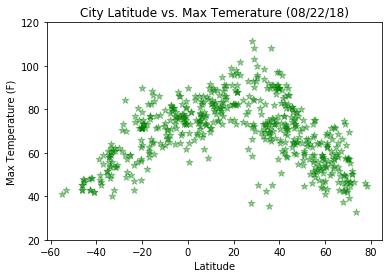

In [9]:
x=weather_data.groupby("City")["Lat"].sum()
y=weather_data.groupby("City")["Max Temp"].sum()

plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=50, alpha=.4) 
plt.title("City Latitude vs. Max Temerature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim([20,120])

plt.show()

#### Latitude vs. Humidity Plot

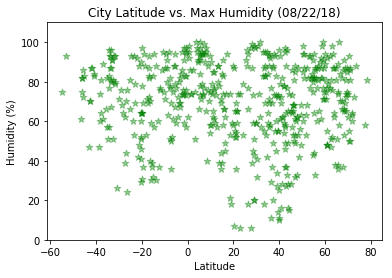

In [10]:
x=weather_data.groupby("City")["Lat"].sum()
y=weather_data.groupby("City")["Humidity"].sum()

plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=50, alpha=.4) 
plt.title("City Latitude vs. Max Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim([0,110])

plt.show()

#### Latitude vs. Cloudiness Plot

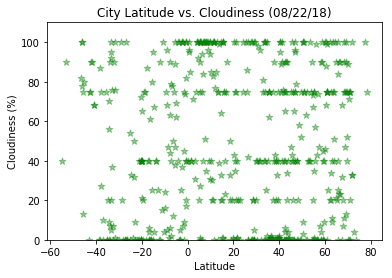

In [11]:
x=weather_data.groupby("City")["Lat"].sum()
y=weather_data.groupby("City")["Cloudiness"].sum()

plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=50, alpha=.4) 
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim([0,110])

plt.show()

#### Latitude vs. Wind Speed Plot

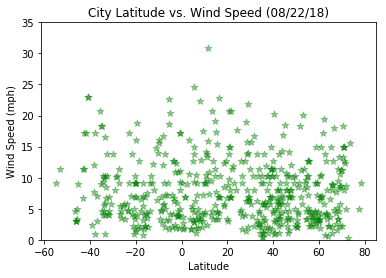

In [13]:
x=weather_data.groupby("City")["Lat"].sum()
y=weather_data.groupby("City")["Wind Speed"].sum()

plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=50, alpha=.4) 
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim([0,35])

plt.show()